In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

import warnings
warnings.filterwarnings("ignore")

# Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Dataset Overview 

https://www.kaggle.com/datasets/thedevastator/exploring-risk-factors-for-cardiovascular-diseas?resource=download&select=heart_data.csv

1. **Age**: Age of participant (integer)
2. **Gender**: Gender of participant (male = 1 / female =2) 
3. **Height**: Height measured in centimeters (integer) 
4. **Weight**: Weight measured in kilograms (integer)
5. **Ap_hi**: Systolic blood pressure reading taken from patient (integer)
6. **Ap_lo** : Diastolic blood pressure reading taken from patient (integer)
7. **Cholesterol** : Total cholesterol level read as mg/dl on a scale 0 - 5+ units( integer). Each unit denoting increase/decrease by 20 mg/dL respectively.
8. **Gluc** : Glucose level read as mmol/l on a scale 0 - 16+ units( integer). Each unit denoting increase Decreaseby 1 mmol/L respectively.
9. **Smoke**  : Whether person smokes or not(binary; 0= No , 1=Yes).              
10. **Alco** : Whether person drinks alcohol or not(binary; 0 =No ,1 =Yes ).                     
11. **Active** : whether person physically active or not( Binary ;0 =No,1 = Yes ).
12. **Cardio** : whether person suffers from cardiovascular diseases or not(Binary ;0 – no , 1 ­‑yes ).

In [2]:
# df = pd.read_csv('archive.zip', compression='zip')
df = pd.read_csv('../Data/heart_data.csv')
df.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Basic Data Checkup & Feature Engineering

In [3]:
# Basic Checks between index and id 
if (df['index'] == df['id']).all():
    df = df.drop(['index'], axis=1)
elif len(df['index'].unique()) < len(df['id'].unique()):
    df = df.drop(['id'], axis=1)
else:
    df = df.drop(['index'], axis=1)

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.shape

(70000, 13)

In [6]:
# Checking for missing values
df.isnull().sum().sort_values(ascending=False)

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
# Checking for the unique values in the datasets
df.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [8]:
# Age is given in days, we need to convert it to years
def convert_to_years(days):
    return days // 365

df['age'] = df['age'].apply(convert_to_years)

In [9]:
# Height is in cm and weight is in Kg.

# To convert float data type to integer
df['weight'] = df['weight'].astype(int)

# To calculate BMI - Body mass index is a person's weight in kilograms divided by the square of height in meters.
df['BMI']= df['weight'] / ((df['height']/100)**2)
df['BMI'] = df['BMI'].astype(int)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50,2,168,62,110,80,1,1,0,0,1,0,21
1,1,55,1,156,85,140,90,3,1,0,0,1,1,34
2,2,51,1,165,64,130,70,3,1,0,0,0,1,23
3,3,48,2,169,82,150,100,1,1,0,0,1,1,28
4,4,47,1,156,56,100,60,1,1,0,0,0,0,23


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           70000 non-null  int64
 1   age          70000 non-null  int64
 2   gender       70000 non-null  int64
 3   height       70000 non-null  int64
 4   weight       70000 non-null  int32
 5   ap_hi        70000 non-null  int64
 6   ap_lo        70000 non-null  int64
 7   cholesterol  70000 non-null  int64
 8   gluc         70000 non-null  int64
 9   smoke        70000 non-null  int64
 10  alco         70000 non-null  int64
 11  active       70000 non-null  int64
 12  cardio       70000 non-null  int64
 13  BMI          70000 non-null  int32
dtypes: int32(2), int64(12)
memory usage: 6.9 MB


## Exploratory Data Analysis

In [11]:
df = df.drop('id', axis=1)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,168,62,110,80,1,1,0,0,1,0,21
1,55,1,156,85,140,90,3,1,0,0,1,1,34
2,51,1,165,64,130,70,3,1,0,0,0,1,23
3,48,2,169,82,150,100,1,1,0,0,1,1,28
4,47,1,156,56,100,60,1,1,0,0,0,0,23


In [12]:
# sns.pairplot(df[['gender','cholesterol','gluc','smoke','alco','active']], hue ='cardio')
# plt.show()

In [13]:
# Statistics about the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,70000.0,52.840671,6.766774,29.0,48.0,53.0,58.0,64.0
gender,70000.0,1.349571,0.476838,1.0,1.0,1.0,2.0,2.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.204329,14.395953,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.0,1.0,2.0,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.0,1.0,1.0,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.0,0.0,0.0,1.0
alco,70000.0,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0


### Age

In [14]:
df['age'].value_counts().head(10)

55    3927
53    3868
57    3686
56    3607
54    3605
59    3576
49    3417
58    3409
51    3368
52    3279
Name: age, dtype: int64

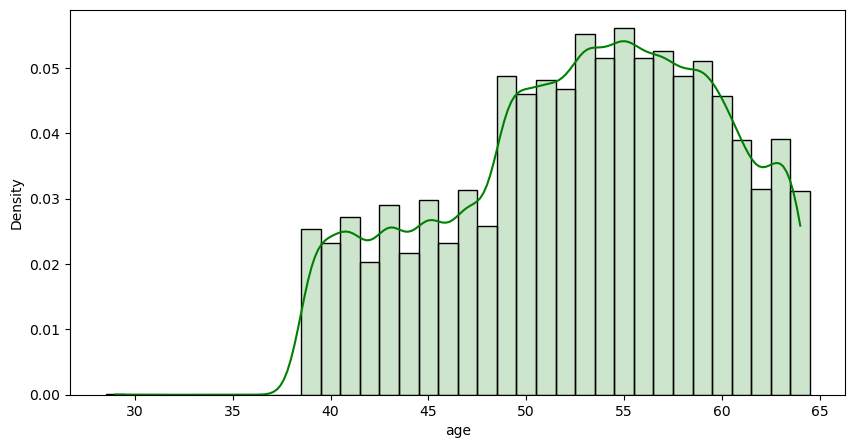

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(df['age'],kde= True,stat='density', discrete=True, color='green', alpha=0.2)
plt.show()

* Age Group from 39 to 64

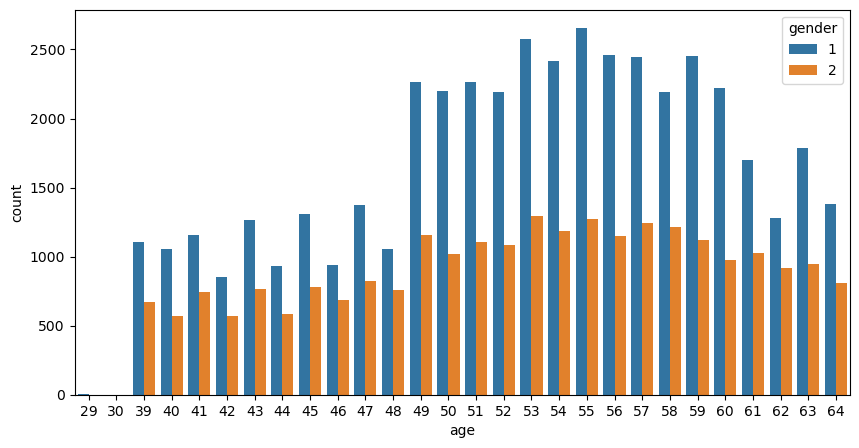

In [16]:
# Age Vs Genger - (male = 1 / female =2)
plt.figure(figsize=(10,5))
sns.countplot(x=df['age'],hue='gender', data=df)
plt.show()

* We have lot of male participants in each age group

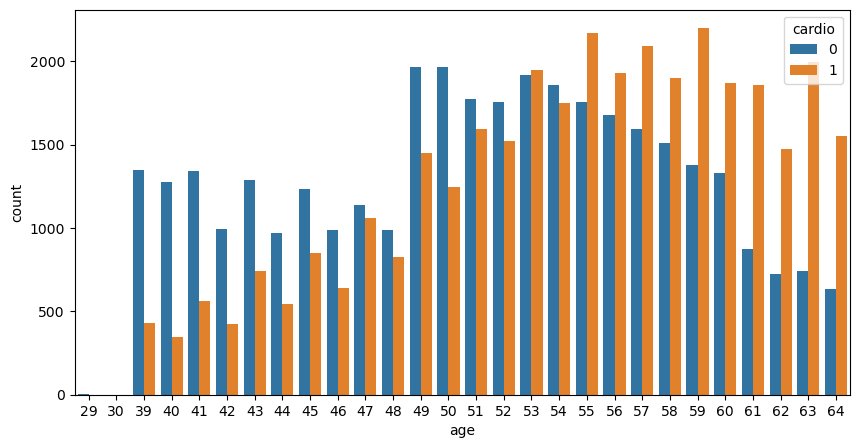

In [17]:
# Age Vs Cardio (Binary;0 – no, 1 ‑yes )
plt.figure(figsize=(10,5))
sns.countplot(x=df['age'],hue='cardio', data=df)
plt.show()

* This implies that people more than 55 years of age are more prone to cardiovascular diseases. Ratio of diseased to healthy people increases with age.

### Gender

Gender of participant (male = 1 / female =2)

In [18]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,168,62,110,80,1,1,0,0,1,0,21
1,55,1,156,85,140,90,3,1,0,0,1,1,34
2,51,1,165,64,130,70,3,1,0,0,0,1,23
3,48,2,169,82,150,100,1,1,0,0,1,1,28
4,47,1,156,56,100,60,1,1,0,0,0,0,23


In [19]:
df["gender"].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

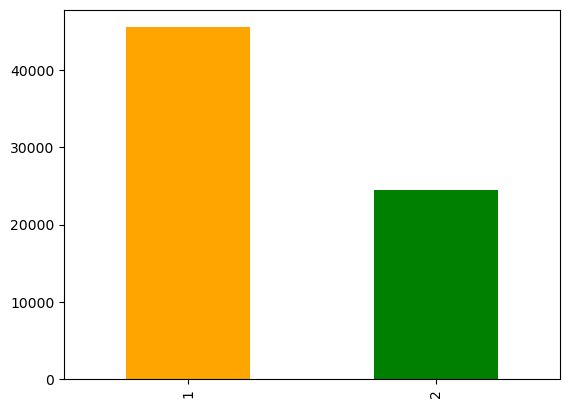

In [20]:
df["gender"].value_counts().plot(kind="bar", color=["orange", "green"]);

* We have more male than female in the datasets

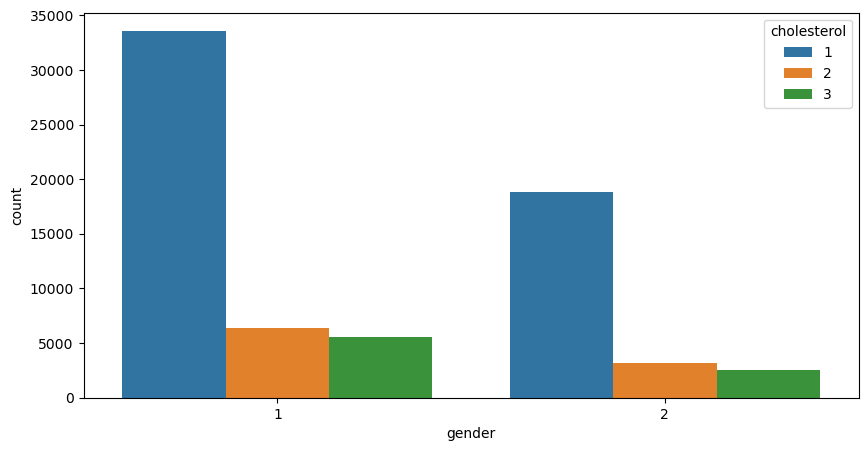

In [21]:
# Gender Vs cholesterol level (Cholesterol is found in three levels, 1,2 and 3, 3 being the highest.)
plt.figure(figsize=(10,5))
sns.countplot(x='gender',hue=df['cholesterol'], data=df)
plt.show()

* For all levels the male gender higher cholesterol level

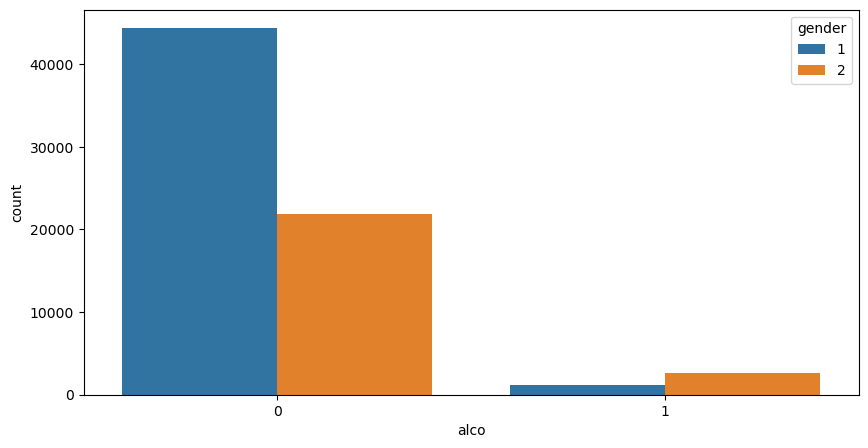

In [22]:
# Gender Vs Alcholic (binary; 0 =No ,1 =Yes ).
plt.figure(figsize=(10,5))
sns.countplot(x=df['alco'],hue='gender', data=df)
plt.show()

* Female are more alcholic than the male species

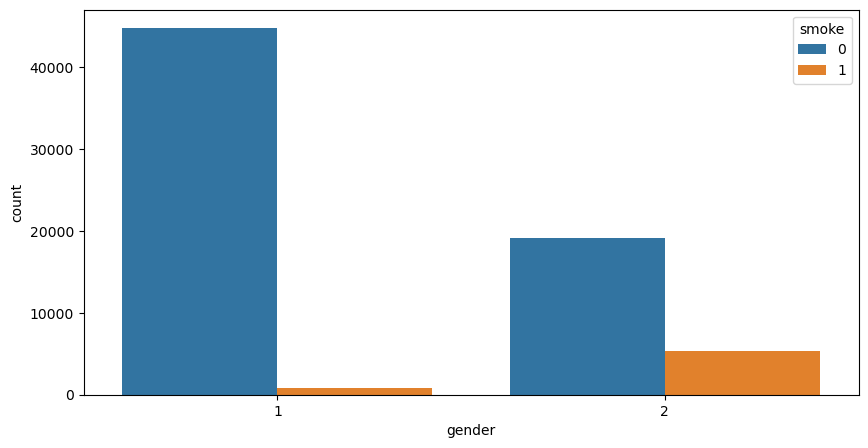

In [23]:
# Gender Vs Smoke (binary; 0= No , 1=Yes)..
plt.figure(figsize=(10,5))
sns.countplot(x='gender',hue=df['smoke'], data=df)
plt.show()

* Female tends to smoke more than the male

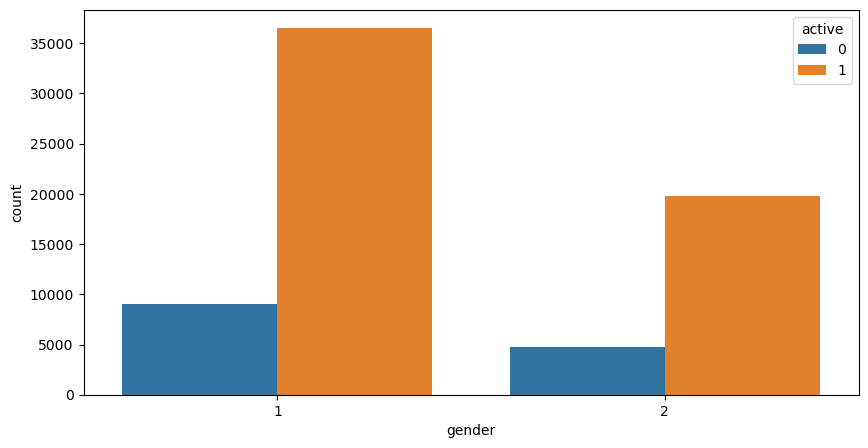

In [24]:
# Gender Vs Physical activity (binary; 0= No , 1=Yes)..
plt.figure(figsize=(10,5))
sns.countplot(x='gender',hue=df['active'], data=df)
plt.show()

* Male tend to be physical active this may be due by either due to exercise or the kind of work they do

### Heights & Weights

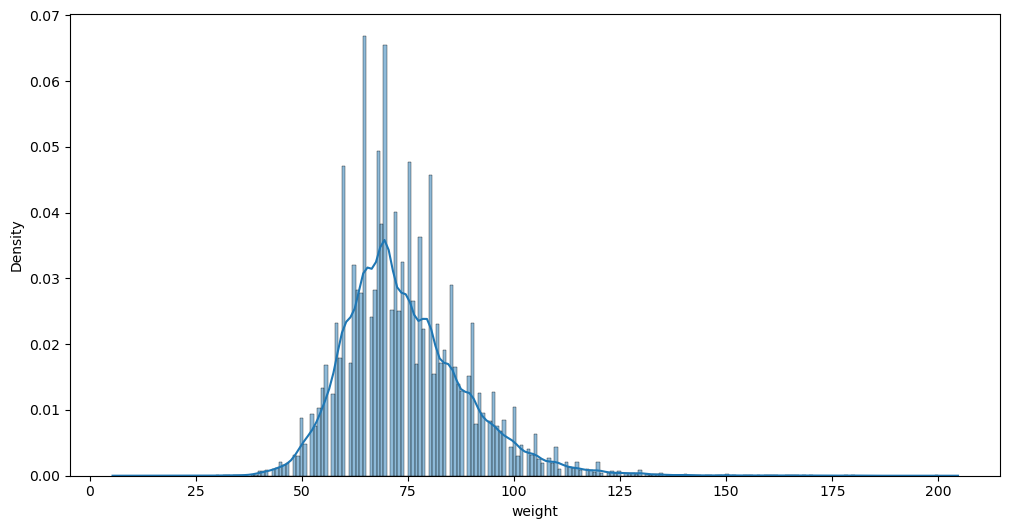

In [25]:
## Let's see the distribution of weight
plt.figure(figsize=(12,6))
sns.histplot(df['weight'],kde=True,stat='density',kde_kws=dict(cut=3))
plt.show()

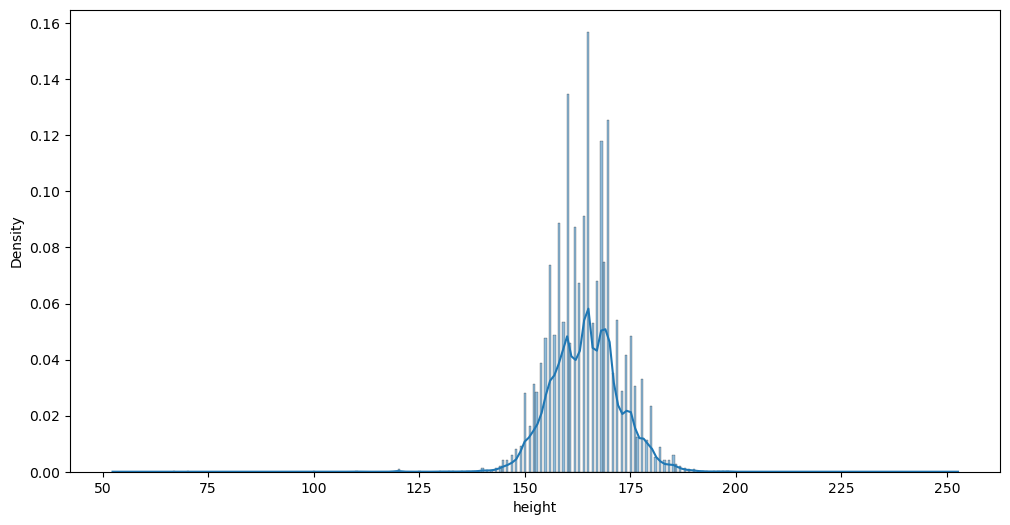

In [26]:
## Let's see the distribution of height
plt.figure(figsize=(12,6))
sns.histplot(df['height'],kde=True,stat='density',kde_kws=dict(cut=3))
plt.show()

### BMI

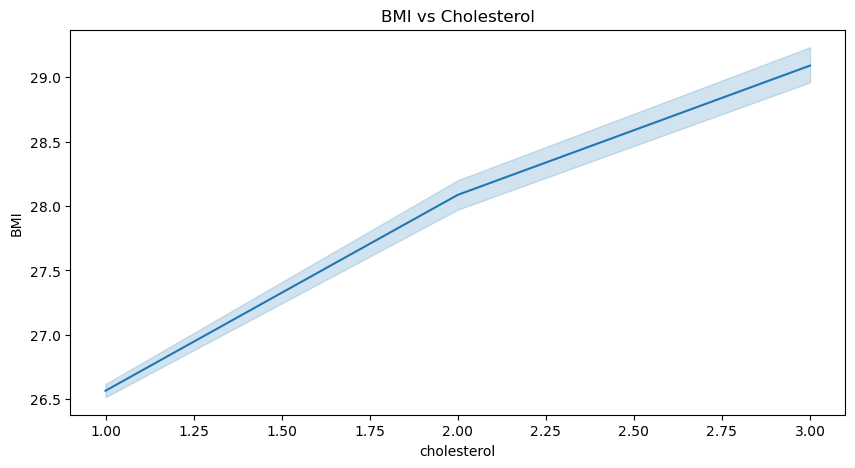

In [27]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df['cholesterol'], y=df['BMI'])
plt.title("BMI vs Cholesterol")
plt.show()

* This shows that the people with higher body mass index tend to have higher cholesterol levels.

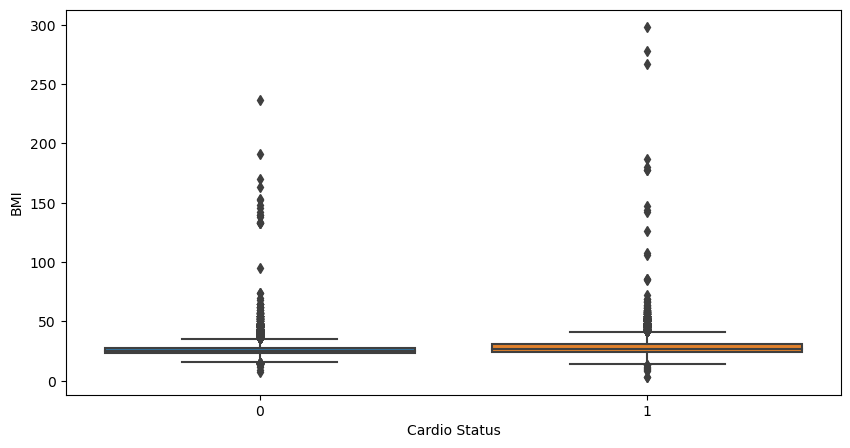

In [44]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cardio', y='BMI', data=df)

# set labels for x and y axis
plt.xlabel('Cardio Status')
plt.ylabel('BMI')

# show the plot
plt.show()

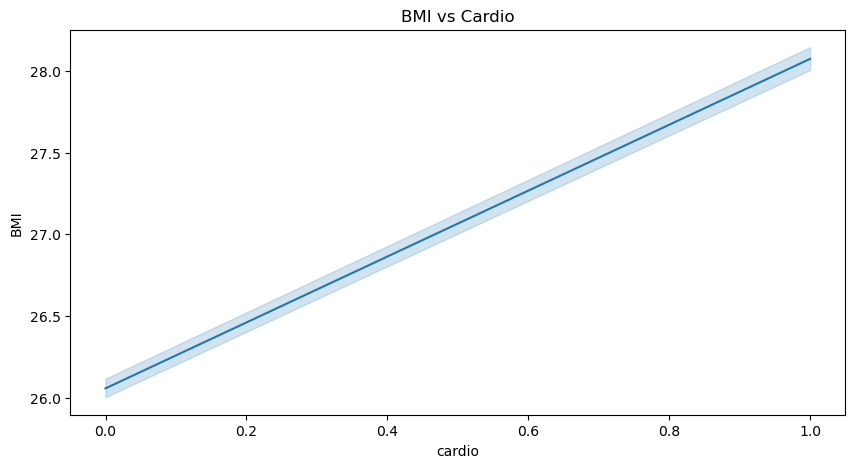

In [28]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df['cardio'], y=df['BMI'])
plt.title("BMI vs Cardio")
plt.show()

* People with higher BMI tend to have cardiovascular diseases.

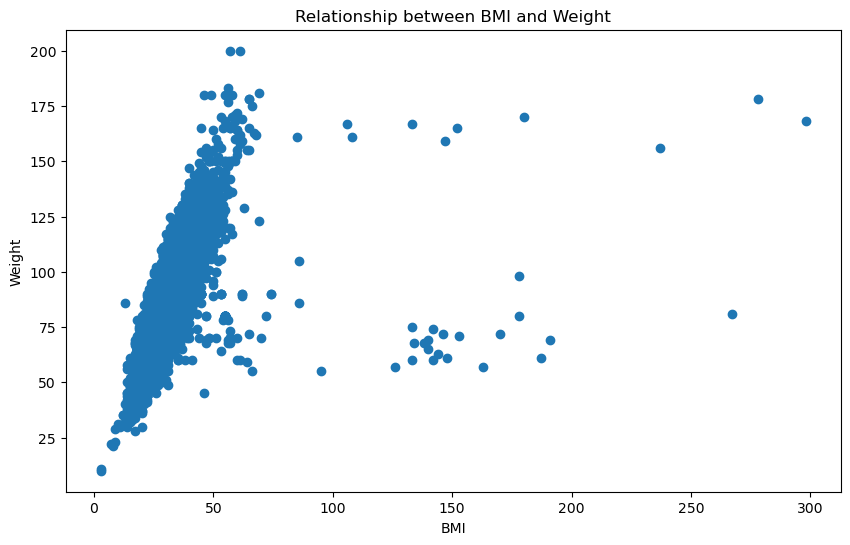

In [45]:
## BMI Vs Weight
plt.figure(figsize=(10, 6))
plt.scatter(df['BMI'], df['weight'])
plt.xlabel('BMI')
plt.ylabel('Weight')
plt.title('Relationship between BMI and Weight')
plt.show()

### cholesterol	

In [29]:
df['cholesterol'].value_counts()

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

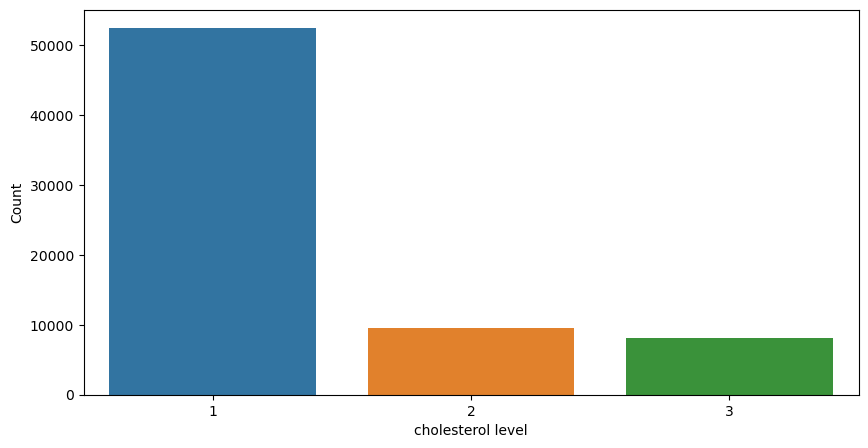

In [30]:
chol = df['cholesterol'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=chol.index, y=chol.values)
plt.xlabel('cholesterol level')
plt.ylabel('Count')
plt.show()

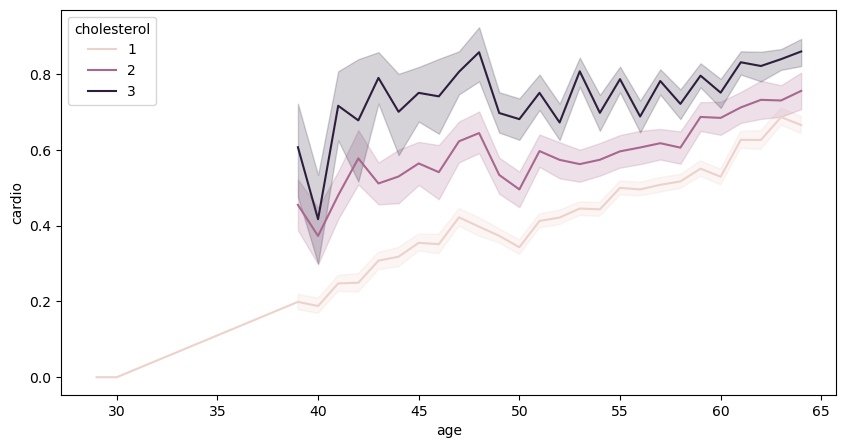

In [31]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df['age'],y=df['cardio'],hue='cholesterol', data=df)
plt.show()

* Cardiovascular diseases are increasing with age as well as with cholesterol.

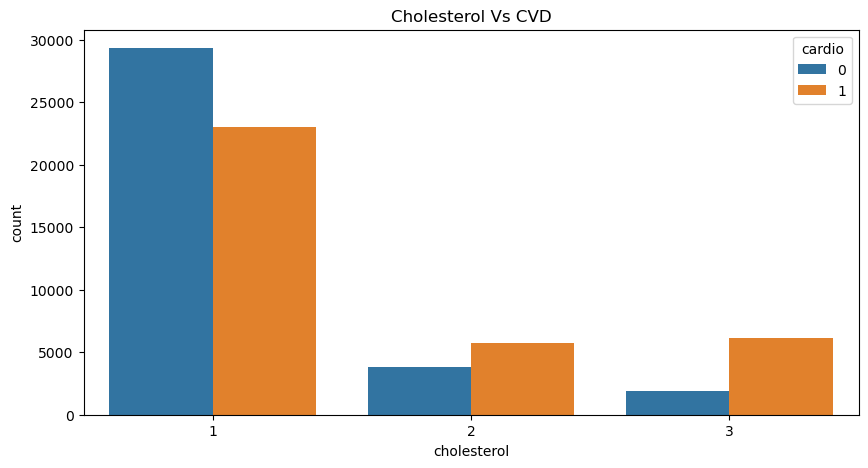

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x='cholesterol',hue='cardio',data=df)
plt.title('Cholesterol Vs CVD')
plt.show()

* Level 1 Cholesterol level has the highest CVD count

### Cardio

In [33]:
cardio = df['cardio'].value_counts()
cardio

0    35021
1    34979
Name: cardio, dtype: int64

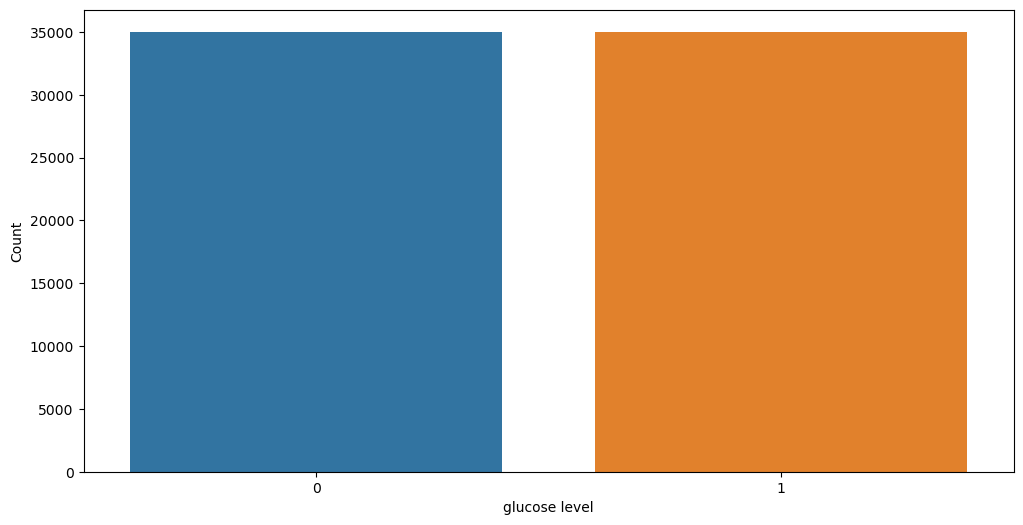

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(x=cardio.index, y=cardio.values)
plt.xlabel('glucose level')
plt.ylabel('Count')
plt.show()

* Highly balance target column

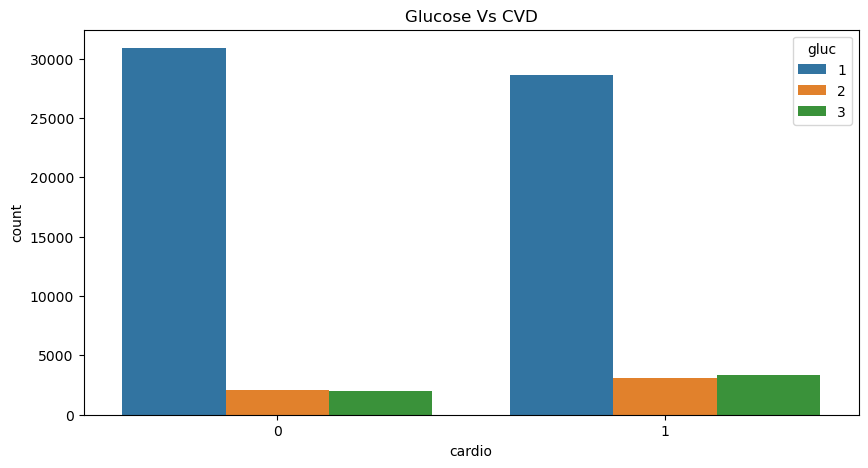

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(x='cardio',hue='gluc',data=df)
plt.title('Glucose Vs CVD')
plt.show()

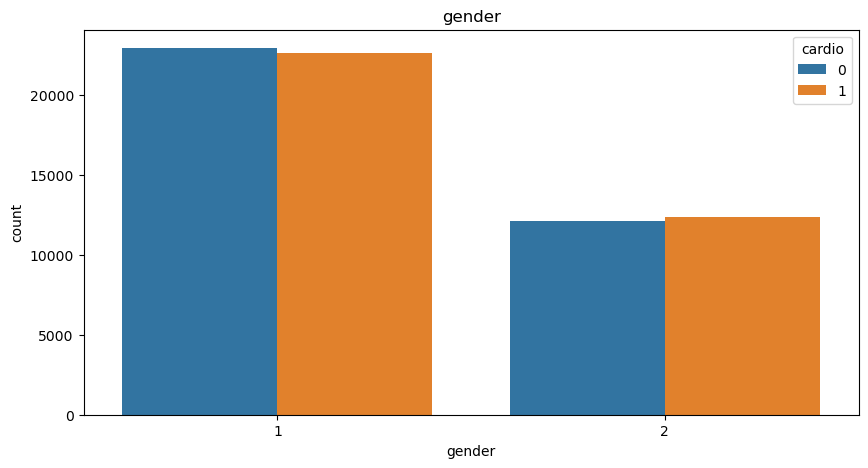

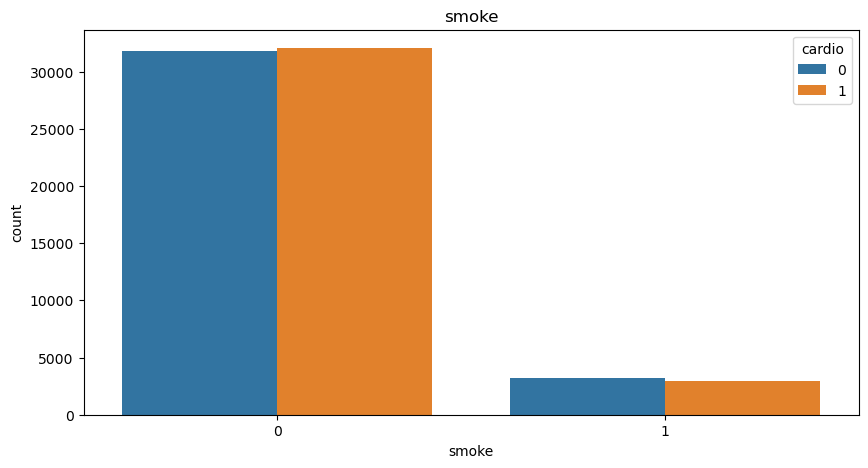

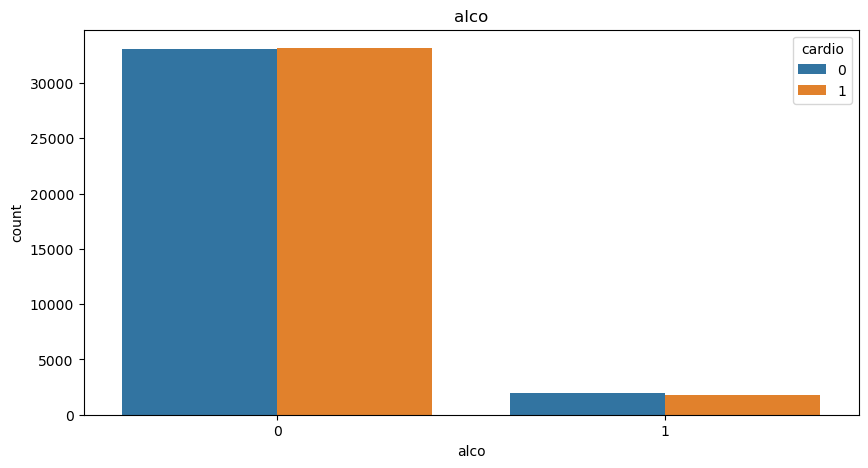

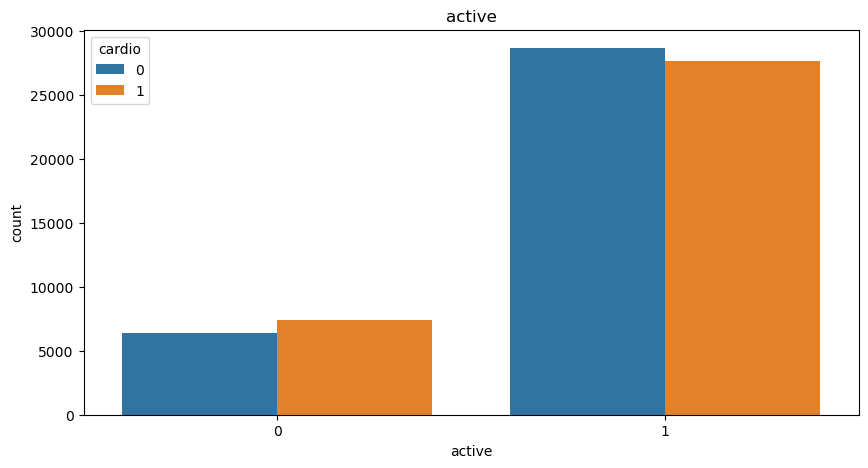

In [36]:
## Let's visualize categorical features with respect to target feature names
features = ['gender','smoke','alco', 'active']
for col in features:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col,hue='cardio',data=df)
    plt.title(col)
    plt.show()

* So gender plays a important role in it as most of the mens have more risk for getting this disease.
* Similar with active which is suprising that those who are physically active have more risk.
* And for other features like smoke and alcohol_consumption it dosn't have much risk for getting this disease. The one reason can be imbalanced data in these features as most of the values are 0.

### Checking for Outliers

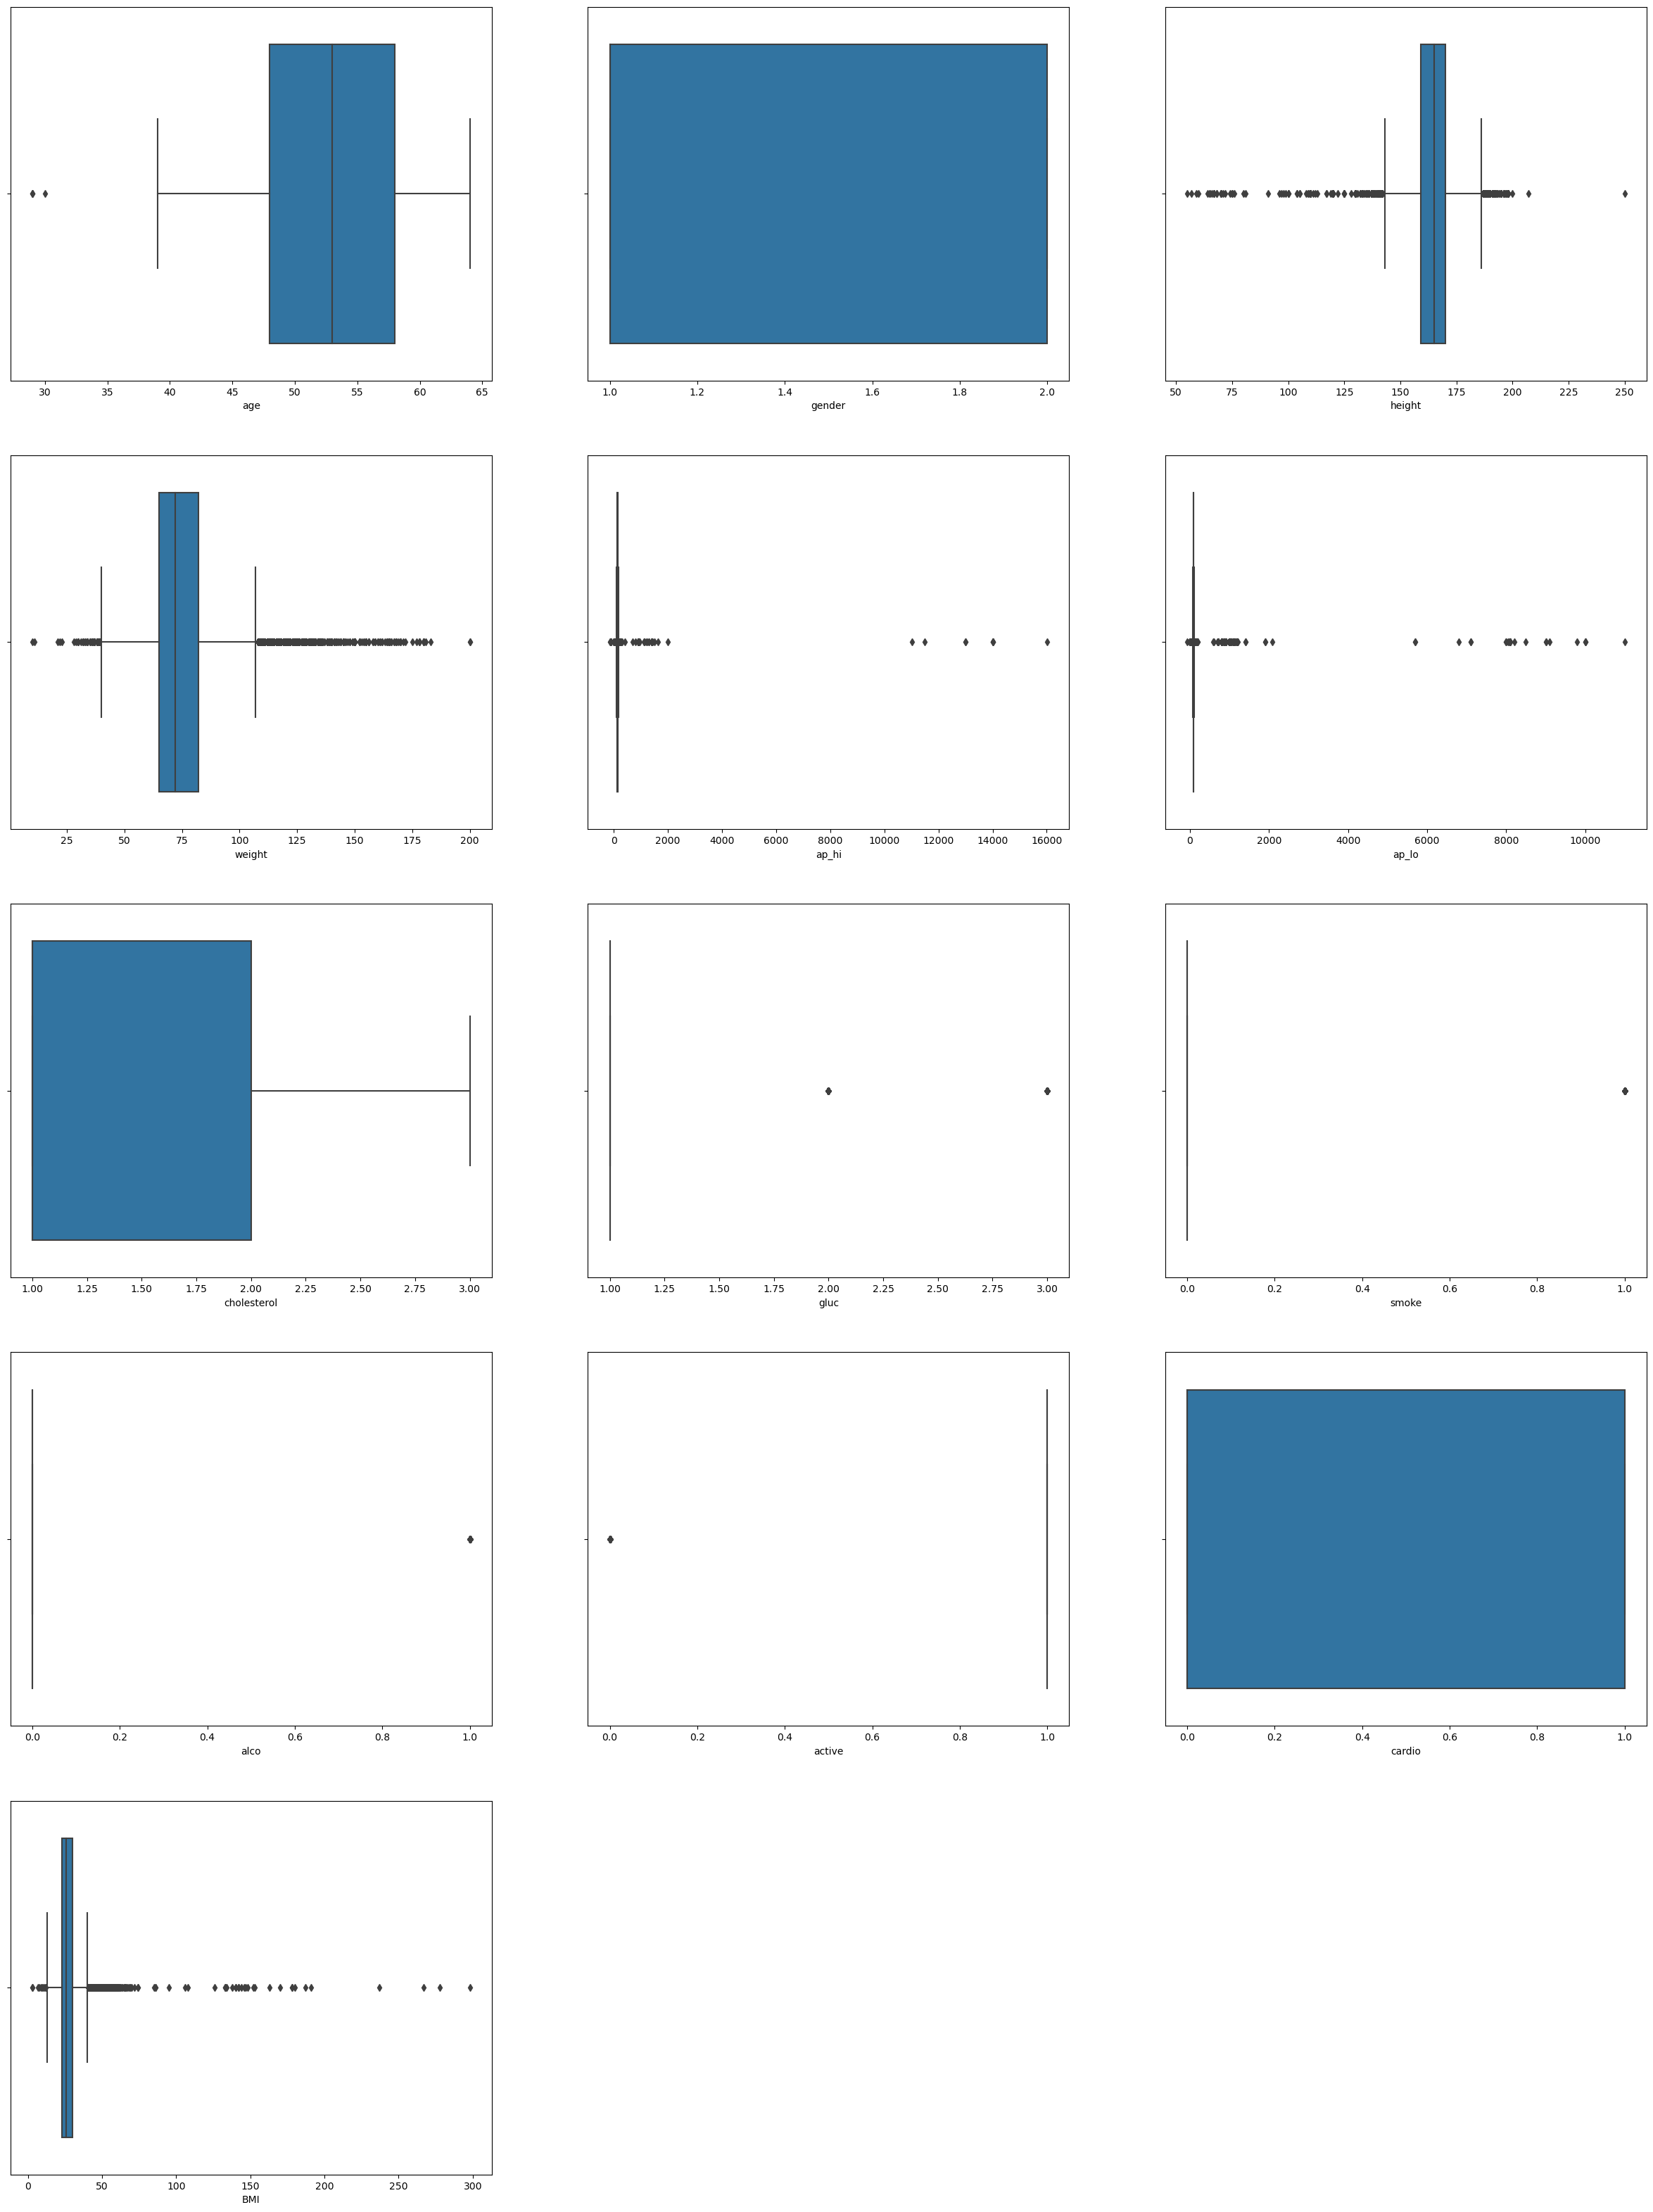

In [37]:
from Python_Functions import outliers

outliers.check_outliers(df)

### Correlation

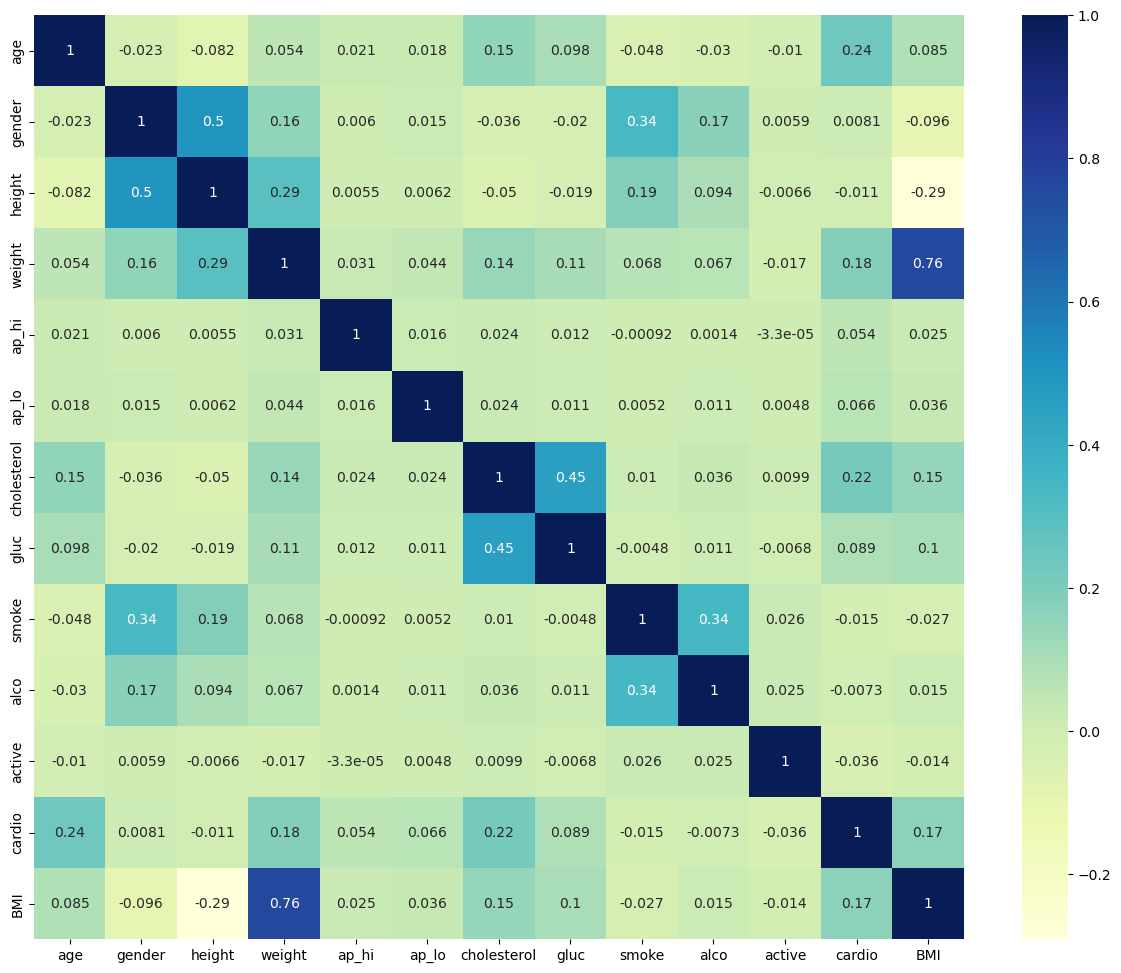

In [39]:
corr = df.corr(method = 'pearson')
plt.figure(figsize = (15,12))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show();

In [40]:
# # Saving the new datasets
# df.to_csv('../Data/new_data.csv', index=False)

## Final Observations

1. Age Group within the dataset is from from 39 to 64
2. We have lot of male participants in each age group
3. This implies that people more than 55 years of age are more prone to cardiovascular diseases. Ratio of diseased to healthy people increases with age.
4. For each cholesterol level, the male register the highest in all levels.
5. Female are more alcholic than the male.
6. Female are smoke more than the male.
7. Male tend to be more physically active this may be due by either due to exercise or the kind of work they do.
8. Weights recorded is within 10 - 200 kg
9. Height recorded is withing 55 - 250 cm
10. People with higher BMI tend to have higher cholesterol levels.
11. People with higher BMI tend to have higher risk in getting cardiovascular diseases.
12. The risk of one getiing the Cardiovascular disease increase with age and cholesterol level.
13. Gender plays an important role as most of the men have higher risk for getting this disease.
14. People who are physically active have higher risk of getting CVD.